Class Rebalancing:
The first 2 models in this worksheet train the 10% and 1% Cat models by oversampling the cat train dataset. This is achieved by setting class_weights = balanced during model.fit()

Model PreTraining:
The second 2 models import a pre-trained model to extract animal features on, and train new models based on it.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

!unzip 'drive/My Drive/dataset/dogs-vs-cats.zip'
!unzip 'test1.zip'
!unzip 'train.zip'

!mkdir test1/images
!mkdir train/{dog,cat}

!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat
!find test1 -maxdepth 1 -type f | xargs -I{} mv {} test1/images

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
##########  Cause Rare Events: Cats = 10% ############

In [5]:
ten_train_dir = os.path.join('data', 'ten','train')
ten_train_cats_dir = os.path.join(ten_train_dir, 'cat')
ten_train_dogs_dir = os.path.join(ten_train_dir, 'dog')
ten_validation_dir = os.path.join('data','ten', 'val')
ten_validation_cats_dir = os.path.join(ten_validation_dir, 'cat')
ten_validation_dogs_dir = os.path.join(ten_validation_dir, 'dog')
ten_test_dir = os.path.join('data', 'ten','test')
ten_test_dir_cat = os.path.join(ten_test_dir, 'cat')
ten_test_dir_dog = os.path.join(ten_test_dir, 'dog')

In [6]:
shutil.rmtree("data/ten/val/.ipynb_checkpoints")
shutil.rmtree("data/ten/train/.ipynb_checkpoints")
shutil.rmtree("data/ten/test/.ipynb_checkpoints")
shutil.rmtree("data/ten/.ipynb_checkpoints")
shutil.rmtree("data/.ipynb_checkpoints")

In [7]:
#Copy files so new dataset have 10% cats, but same total (2000 train, 1000 val, 2000 test)
original = 'train/cat'
fnames = ['cat.{}.jpg'.format(i) for i in range(200)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(ten_train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(200, 300)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(300, 500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_test_dir_cat, fname)
    shutil.copyfile(src, dst)

original = 'train/dog'
fnames = ['dog.{}.jpg'.format(i) for i in range(1800)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(ten_train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1800, 2700)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2700, 4500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_test_dir_dog, fname)
    shutil.copyfile(src, dst)

In [8]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        ten_train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle = False)

validation_generator = validation_datagen.flow_from_directory(
        ten_validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        ten_test_dir,
        target_size=(150, 150),
        class_mode='binary',
        batch_size=1,
        shuffle = False)

class_weights = class_weight.compute_class_weight(
           'balanced',
           classes = np.unique(train_generator.classes),
           y=train_generator.classes)
class_weights = {i : class_weights[i] for i in range(2)}

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size,
      class_weight=class_weights)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - 29s 292ms/step - loss: 0.7874 - acc: 0.6768 - val_loss: 0.4222 - val_acc: 0.8992
Epoch 2/30
62/62 [==============================] - 18s 285ms/step - loss: 0.9281 - acc: 0.8916 - val_loss: 0.6434 - val_acc: 0.8992
Epoch 3/30
62/62 [==============================] - 17s 271ms/step - loss: 0.7262 - acc: 0.6663 - val_loss: 0.5950 - val_acc: 0.8992
Epoch 4/30
62/62 [==============================] - 18s 285ms/step - loss: 0.7455 - acc: 0.7683 - val_loss: 0.5435 - val_acc: 0.8992
Epoch 5/30
62/62 [==============================] - 17s 268ms/step - loss: 0.7425 - acc: 0.8984 - val_loss: 0.6069 - val_acc: 0.8992
Epoch 6/30
62/62 [==============================] - 18s 288ms/step - loss: 0.7556 - acc: 0.8984 - val_loss: 0.5843 - val_acc: 0.8992
Epoch 7/30
62/62 [==============================] - 17s 280ms/step - loss: 0

In [15]:
model.save('Improved_10%_cats_and_dogs.keras')

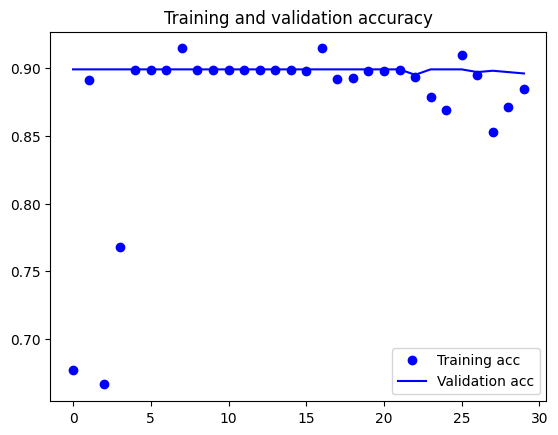

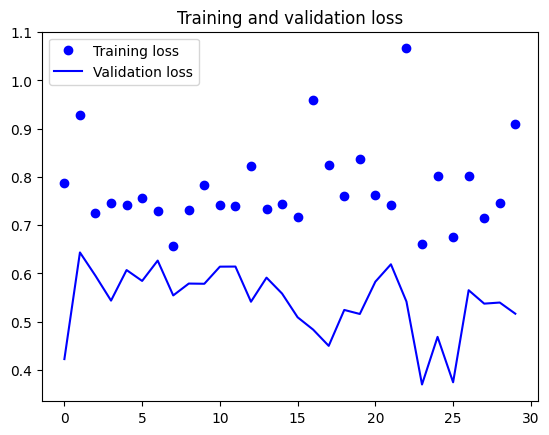

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-17-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


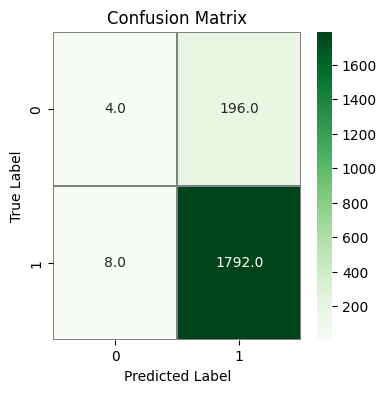

<Figure size 640x480 with 0 Axes>

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix_ten.png')

In [19]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04       200
           1       0.90      1.00      0.95      1800

    accuracy                           0.90      2000
   macro avg       0.62      0.51      0.49      2000
weighted avg       0.84      0.90      0.86      2000



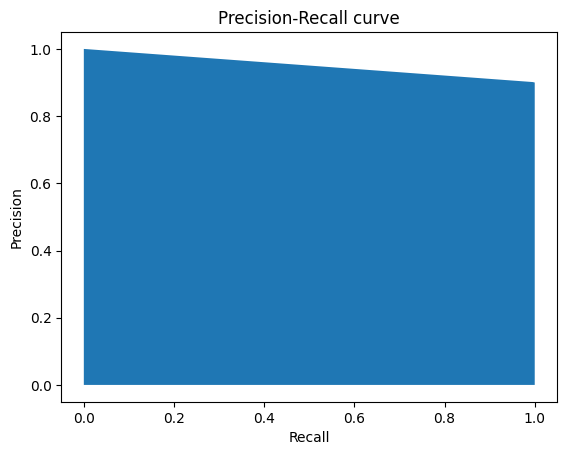

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('P_R_ten.png')

In [21]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 7s 3ms/step


In [22]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

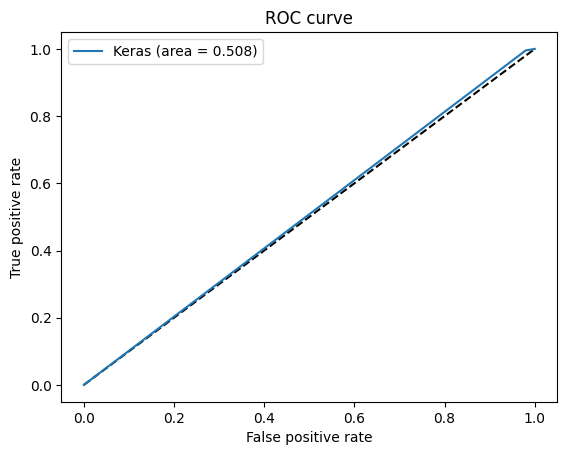

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('ROC_ten.png')


In [ ]:
####### Rare Event: Cats = 1%  ######

In [24]:
one_train_dir = os.path.join('data', 'one','train')
one_train_cats_dir = os.path.join(one_train_dir, 'cat')
one_train_dogs_dir = os.path.join(one_train_dir, 'dog')
one_validation_dir = os.path.join('data','one', 'val')
one_validation_cats_dir = os.path.join(one_validation_dir, 'cat')
one_validation_dogs_dir = os.path.join(one_validation_dir, 'dog')
one_test_dir = os.path.join('data', 'one','test')
one_test_dir_cat = os.path.join(one_test_dir, 'cat')
one_test_dir_dog = os.path.join(one_test_dir, 'dog')

In [25]:
shutil.rmtree("data/one/val/.ipynb_checkpoints")
shutil.rmtree("data/one/train/.ipynb_checkpoints")
shutil.rmtree("data/one/test/.ipynb_checkpoints")
shutil.rmtree("data/one/.ipynb_checkpoints")

In [26]:
#Copy files so new dataset have 10% cats, but same total (2000 train, 1000 val, 2000 test)
original = 'train/cat'
fnames = ['cat.{}.jpg'.format(i) for i in range(20)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(one_train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(20, 30)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(30, 50)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_test_dir_cat, fname)
    shutil.copyfile(src, dst)

original = 'train/dog'
fnames = ['dog.{}.jpg'.format(i) for i in range(1980)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(one_train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1980, 2970)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2970, 4950)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_test_dir_dog, fname)
    shutil.copyfile(src, dst)

In [27]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [29]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        one_train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle = False)

validation_generator = validation_datagen.flow_from_directory(
        one_validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        one_test_dir,
        target_size=(150, 150),
        class_mode='binary',
        batch_size=1,
        shuffle = False)

class_weights = class_weight.compute_class_weight(
           'balanced',
           classes = np.unique(train_generator.classes),
           y=train_generator.classes)
class_weights = {i : class_weights[i] for i in range(2)}

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size,
      class_weight = class_weights)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - 29s 441ms/step - loss: 1.4967 - acc: 0.9893 - val_loss: 0.0851 - val_acc: 0.9899
Epoch 2/30
62/62 [==============================] - 22s 355ms/step - loss: 2.9001 - acc: 0.9898 - val_loss: 0.0765 - val_acc: 0.9899
Epoch 3/30
62/62 [==============================] - 21s 343ms/step - loss: 1.8517 - acc: 0.9898 - val_loss: 0.1623 - val_acc: 0.9899
Epoch 4/30
62/62 [==============================] - 20s 330ms/step - loss: 1.6281 - acc: 0.9898 - val_loss: 0.1960 - val_acc: 0.9899
Epoch 5/30
62/62 [==============================] - 25s 401ms/step - loss: 1.2871 - acc: 0.9898 - val_loss: 0.2345 - val_acc: 0.9899
Epoch 6/30
62/62 [==============================] - 18s 285ms/step - loss: 1.0594 - acc: 0.9898 - val_loss: 0.0692 - val_acc: 0.9899
Epoch 7/30
62/62 [==============================] - 18s 287ms/step - loss: 2

In [30]:
model.save('Improved_1%_cats_and_dogs.keras')

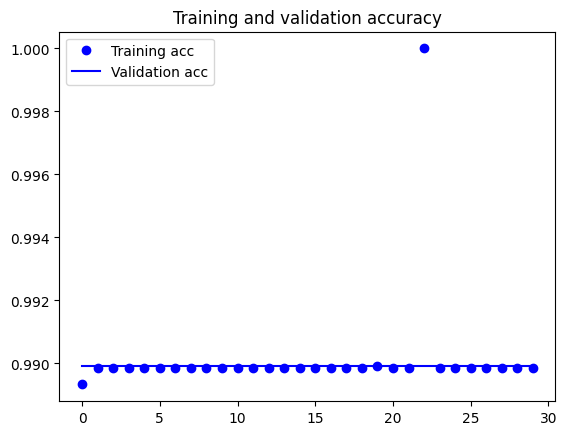

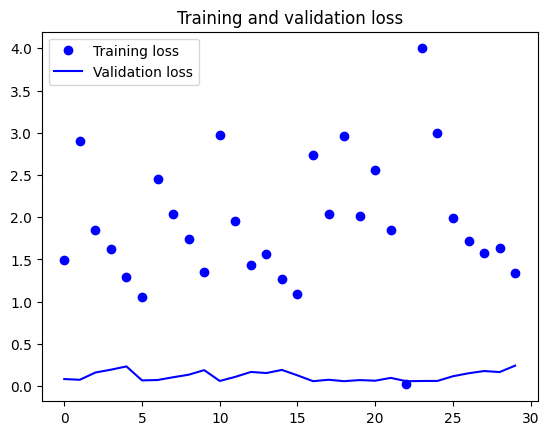

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-32-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


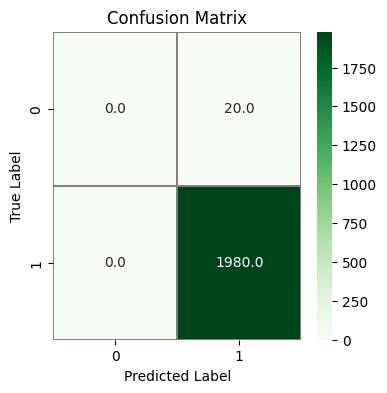

<Figure size 640x480 with 0 Axes>

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('1_confusion_matrix.png')

In [34]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.99      1.00      0.99      1980

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


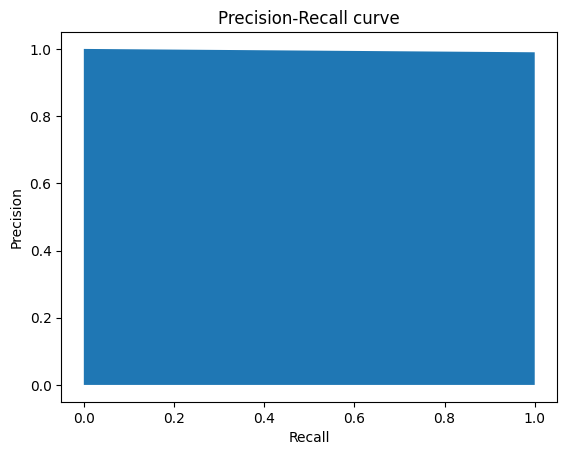

<Figure size 640x480 with 0 Axes>

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('1_precision_recall.png')

In [36]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 11s 6ms/step


In [37]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

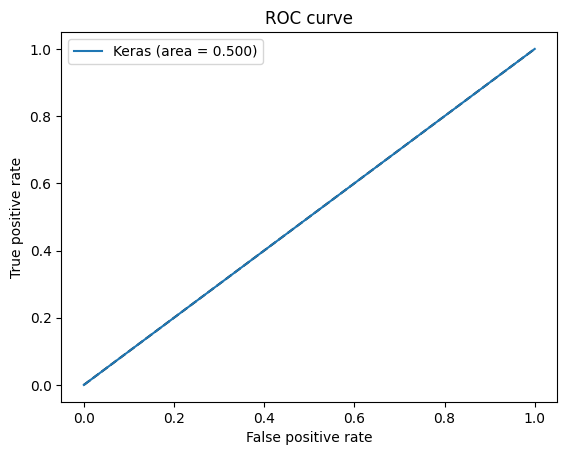

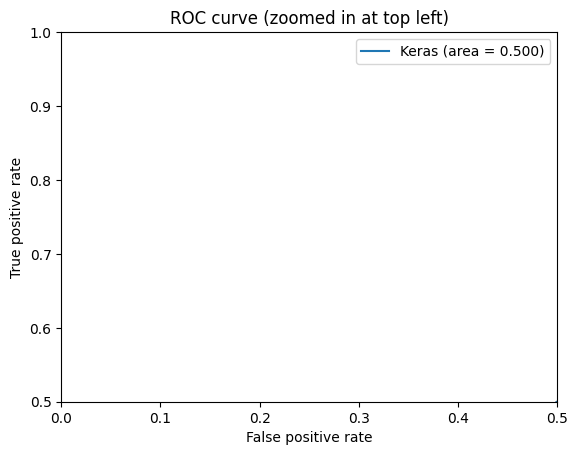

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.5)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
plt.savefig('1_ROC.png')

The cat class was oversampled in each of the above two models by weighting the classes equally in model.fit().

This resulted in a slight improvement on detecting cats when they are 10% of the sample, as the model started predicting some cats. Whereas in the baseline sample, the model predicted all animals to be dogs, therefore incorrectly predicting the pictures of all cats. However, the overall accuracy of the model did not improve dramatically.

However, the 1% cat model behaved identically to the baseline model where it predicted all animals to be dogs. The accuracy was the same, ~99%, which corresponds to the actual population proportion of dogs in the sample.

PRE-TRAINED NETWORK:

In [39]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [41]:
base_dir = 'data/ten'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 23ms/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 22ms/step


In [42]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [45]:
conv_base.trainable = False

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [48]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30


<ipython-input-48-17d88e028dbc>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 22s - loss: 0.4066 - acc: 0.8820 - val_loss: 0.2907 - val_acc: 0.9010 - 22s/epoch - 219ms/step
Epoch 2/30
100/100 - 26s - loss: 0.2574 - acc: 0.9090 - val_loss: 0.2027 - val_acc: 0.9210 - 26s/epoch - 257ms/step
Epoch 3/30
100/100 - 23s - loss: 0.2280 - acc: 0.9110 - val_loss: 0.2024 - val_acc: 0.9200 - 23s/epoch - 232ms/step
Epoch 4/30
100/100 - 18s - loss: 0.2210 - acc: 0.9160 - val_loss: 0.2437 - val_acc: 0.9120 - 18s/epoch - 185ms/step
Epoch 5/30
100/100 - 18s - loss: 0.2155 - acc: 0.9195 - val_loss: 0.1900 - val_acc: 0.9300 - 18s/epoch - 184ms/step
Epoch 6/30
100/100 - 19s - loss: 0.2081 - acc: 0.9260 - val_loss: 0.2017 - val_acc: 0.9260 - 19s/epoch - 185ms/step
Epoch 7/30
100/100 - 19s - loss: 0.1965 - acc: 0.9235 - val_loss: 0.1757 - val_acc: 0.9330 - 19s/epoch - 186ms/step
Epoch 8/30
100/100 - 19s - loss: 0.1842 - acc: 0.9280 - val_loss: 0.2040 - val_acc: 0.9330 - 19s/epoch - 193ms/step
Epoch 9/30
100/100 - 19s - loss: 0.2007 - acc: 0.9175 - val_loss: 0.1681 - val_acc:

In [49]:
model.save('RareEventsImprove_2.keras')

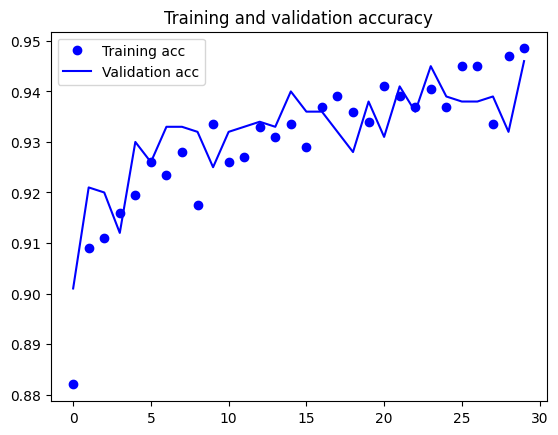

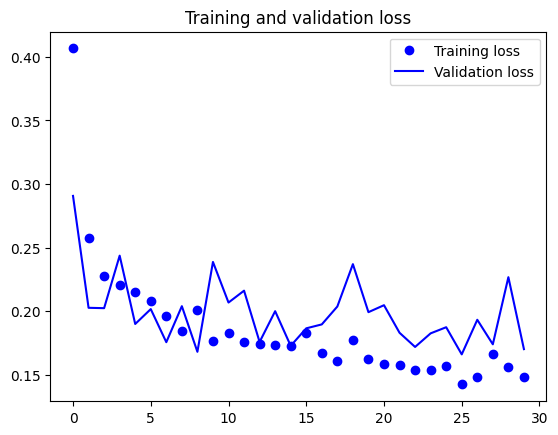

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-51-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


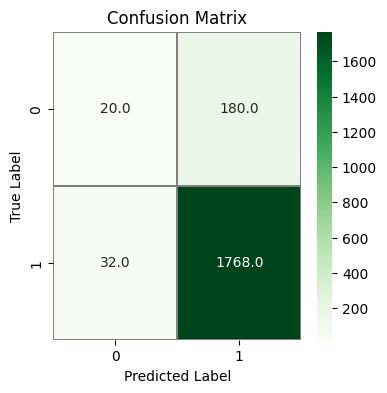

<Figure size 640x480 with 0 Axes>

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('improve_confusion_matrix_10_2.png')

In [53]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.38      0.10      0.16       200
           1       0.91      0.98      0.94      1800

    accuracy                           0.89      2000
   macro avg       0.65      0.54      0.55      2000
weighted avg       0.86      0.89      0.86      2000



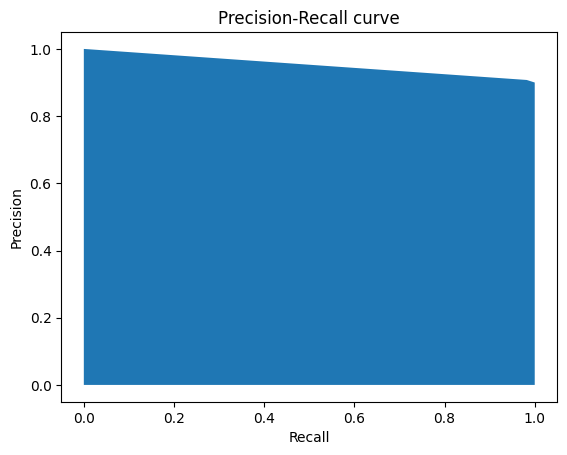

<Figure size 640x480 with 0 Axes>

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('1_precision_recall.png')

In [55]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 14s 7ms/step


In [56]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

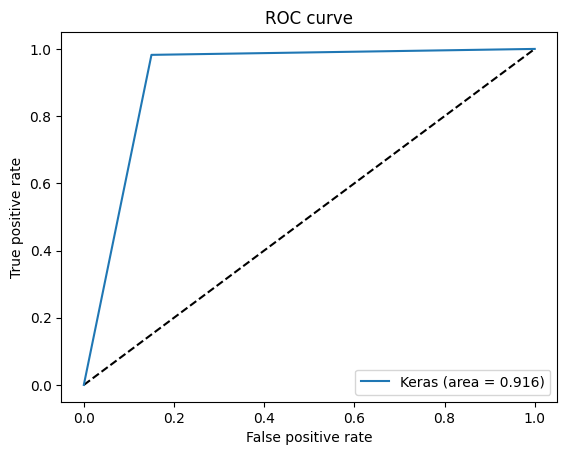

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('ROC_improve_10_2')

1% CAT MODEL

In [58]:
base_dir = 'data/one'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 25ms/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


In [59]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [60]:
conv_base.trainable = False

In [61]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [63]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30


<ipython-input-63-17d88e028dbc>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 20s - loss: 0.1060 - acc: 0.9810 - val_loss: 0.0610 - val_acc: 0.9900 - 20s/epoch - 202ms/step
Epoch 2/30
100/100 - 26s - loss: 0.0678 - acc: 0.9900 - val_loss: 0.0605 - val_acc: 0.9900 - 26s/epoch - 260ms/step
Epoch 3/30
100/100 - 23s - loss: 0.0594 - acc: 0.9900 - val_loss: 0.0521 - val_acc: 0.9900 - 23s/epoch - 230ms/step
Epoch 4/30
100/100 - 25s - loss: 0.0597 - acc: 0.9900 - val_loss: 0.0462 - val_acc: 0.9900 - 25s/epoch - 251ms/step
Epoch 5/30
100/100 - 21s - loss: 0.0565 - acc: 0.9900 - val_loss: 0.0424 - val_acc: 0.9900 - 21s/epoch - 209ms/step
Epoch 6/30
100/100 - 27s - loss: 0.0583 - acc: 0.9900 - val_loss: 0.0472 - val_acc: 0.9900 - 27s/epoch - 270ms/step
Epoch 7/30
100/100 - 31s - loss: 0.0515 - acc: 0.9900 - val_loss: 0.0425 - val_acc: 0.9920 - 31s/epoch - 311ms/step
Epoch 8/30
100/100 - 18s - loss: 0.0527 - acc: 0.9900 - val_loss: 0.0409 - val_acc: 0.9900 - 18s/epoch - 184ms/step
Epoch 9/30
100/100 - 19s - loss: 0.0494 - acc: 0.9900 - val_loss: 0.0432 - val_acc:

In [64]:
model.save('RareEventsImprove_1_2.keras')

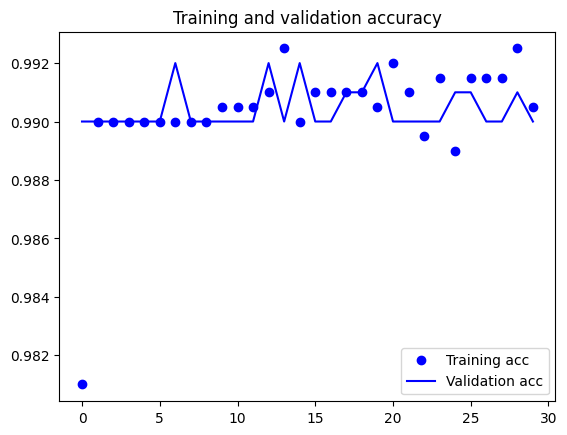

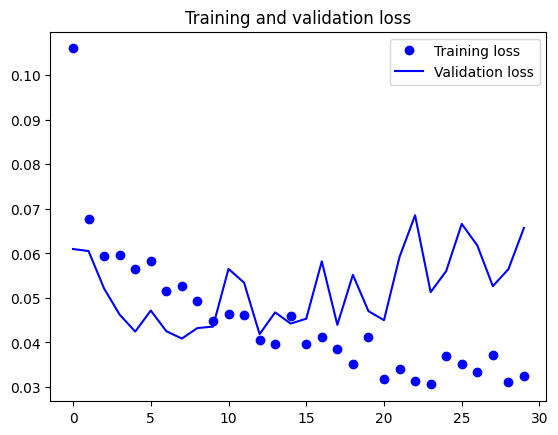

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-66-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


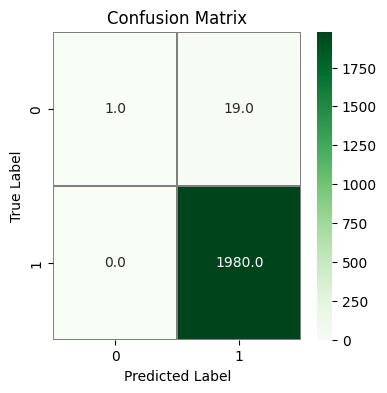

<Figure size 640x480 with 0 Axes>

In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('improve_confusion_matrix_1_2.png')

In [68]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.99      1.00      1.00      1980

    accuracy                           0.99      2000
   macro avg       1.00      0.53      0.55      2000
weighted avg       0.99      0.99      0.99      2000



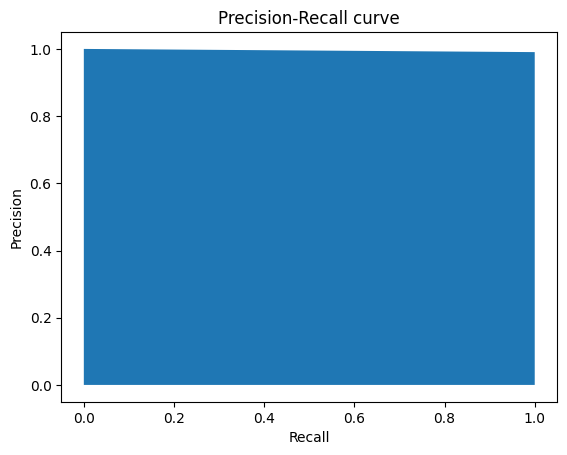

<Figure size 640x480 with 0 Axes>

In [69]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('precision_recall_1_2.png')

In [70]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 14s 7ms/step


In [71]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

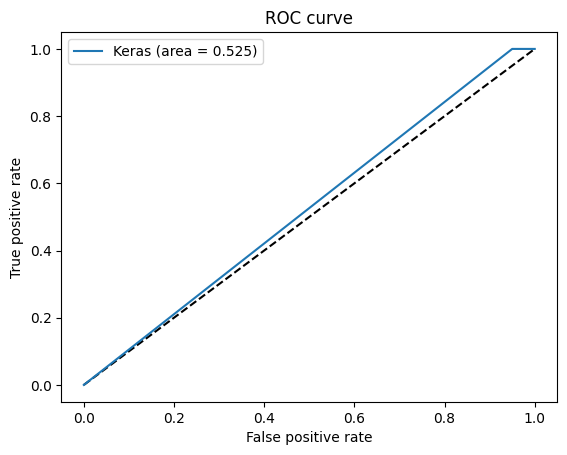

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('ROC_improve_1_2')

Using the pre-trained model increaed the accuracy of th 10% cats model to ~94% prior to overfitting starting at Epoch 15. The model is able to pick out significantly more cats than the baseline.

The accuracy of the 1% cats model remained at 99%, and overfitting began around Epoch 15. Only 1 cat was correctly picked out in the test data.